In [1]:
"""To run this code a file named Data containing all json files should be located in the same directory as the file your running this notebook in. """


'To run this code a file named Data containing all json files should be located in the same directory as the file your running this notebook in. '

In [10]:
import numpy as np
import json as json
import pandas as pd
from pandas.io.json import json_normalize
import mysql.connector
import pyodbc
import os
import sqlite3
import datetime

In [ ]:
def create_db():
    #make connection object to connect with database
    connection_obj = sqlite3.connect('DBL_GROUP_7.db')
 
    # cursor object
    cursor_obj = connection_obj.cursor()
 
    # Drop the data table if already exists.
    cursor_obj.execute("DROP TABLE IF EXISTS all_data")
 
    # Creating table
    table = """ CREATE TABLE IF NOT EXISTS all_data (
            created_at VARCHAR(255) NOT NULL,
            id INT NOT NULL,
            text VARCHAR(255),
            truncated VARCHAR(255),
            in_reply_to_status_id VARCHAR(255),
            reply_count INT,
            retweet_count INT,
            favorite_count INT,
            lang VARCHAR,
            timestamp_ms VARCHAR,
            extended_tweet VARCHAR,
            user_id INT,
            user_name VARCHAR,
            entities_user_mentions VARCHAR,
            year INT,
            month INT,
            day INT
            
        ); """
 
    cursor_obj.execute(table)
   
 
    print("Table is Ready")
 
    # Close the connection
    connection_obj.close()
    


    
db_file = 'DBL_GROUP_7.db'

            
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def load_data(file):
    #using the connec_to_db function to connect to database
    conn = create_connection(db_file)
    # Reading data from file directory
    df = pd.read_json(file, lines=True)
    # Dropping all rows which contain Nan values from column of cols
    df_main = df.drop(df[df.lang != 'en'].index)
    # Normalize data in different json tables to make it one table
    df_main_flat = pd.json_normalize(json.loads(df_main.to_json(orient="records")))
    # Turning the created at column to its original values
    df_main_flat["created_at"] = pd.to_datetime(df_main_flat["created_at"], utc=True, unit='ms')
    # Selecting columns we need for analyzing
    df_main_flat_clean = df_main_flat[['created_at', 'id', 'text', 'user.id', 'truncated', 'in_reply_to_status_id', 'reply_count', 'retweet_count', 'favorite_count', 'lang', 'timestamp_ms', 'extended_tweet', 'user.name']].copy()
    # Changing all values in columns listed below that have a 0 or no value to Nan values
    cols = ['created_at', 'id', 'text', 'user.id']
    df_main_flat_clean[cols] = df_main_flat_clean[cols].replace({'0':np.nan, 0:np.nan, '':np.nan, ' ':np.nan})   
    # Dropping all rows which contain Nan values from column of cols
    df_main_flat_clean[cols].dropna(inplace=True)
    # Renaming the columns to names which are in the database
    df_main_flat_clean = df_main_flat_clean.rename(columns={'user.id': 'user_id', 'user.name' : 'user_name'})
    # Making new rows to include the year, month and day
    df_main_flat_clean['year'] = df_main_flat_clean['created_at'].dt.year
    df_main_flat_clean['month'] = df_main_flat_clean['created_at'].dt.month 
    df_main_flat_clean['day'] = df_main_flat_clean['created_at'].dt.day
    # Appending remaining dataframe to sql database
    df_main_flat_clean.to_sql(name='all_data', con=conn, if_exists='append', index=False)
    
      

    
# select directory which has all of the json files
a_directory = "Data"
# making variable for indicating number of succesfull attempt of opening files
correct = 0
# making variable for indicating number of unsuccesfull attempt of opening files
incorrect = 0

create_db()
#this for loop will call the load_data function for every file in the directory
for file in os.listdir(a_directory):
    filepath = os.path.join(a_directory, file)
    try:
        load_data(filepath)
        correct += 1
        print(correct)
    except: 
        incorrect += 1
        print(f'{incorrect} error')
    if incorrect > 20:
        break

Table is Ready


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


1


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


2
1 error
2 error


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


3


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


4


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


5


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


6


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


7


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


8


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


9


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


10


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


11


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


12


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


13


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


14


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


15


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


16


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


17


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


18


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


19


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


20


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


21


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


22


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


23


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


24


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


25


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


26


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


27


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


28


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


29


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


30


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


31


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


32


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


33


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


34


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


35
3 error


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


36


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


37


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


38


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


39


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


40


<ipython-input-11-e44630952ad2>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main_flat_clean[cols].dropna(inplace=True)


41


In [ ]:
print(incorrect)

In [ ]:
def sql_to_df(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM all_data
                               ''', conn)

    df = pd.DataFrame(sql_query)


    
    return df

# Makes a df from sql database
df = sql_to_df(create_connection(db_file))

In [6]:
df.head(10)

,created_at,id,text,truncated,in_reply_to_status_id,reply_count,retweet_count,favorite_count,lang,timestamp_ms,extended_tweet,user_id,user_name,entities_user_mentions,year,week,day
0,2019-05-22 12:20:01+00:00,1131172864000000000,RT @bttr_as1: @goody_tracy Here’s a list of so...,0.0,None,0,0,0,en,1558527601645,None,3420691215,hounddog,None,2019,21,22
1,2019-05-22 12:20:12+00:00,1131172909000000000,RT @TheRaceRadio: Nice change by @AmericanAir....,0.0,None,0,0,0,en,1558527612449,None,36488556,Bar Buzard,None,2019,21,22
2,2019-05-22 12:20:28+00:00,1131172976000000000,RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...,0.0,None,0,0,0,en,1558527628237,None,14193348,Nimish Gupta,None,2019,21,22
3,2019-05-22 12:20:36+00:00,1131173010000000000,EasyJet was on a slippery slope when it charge...,0.0,None,0,0,0,en,1558527636475,None,1025334292166127617,AiroLuggage,None,2019,21,22
4,2019-05-22 12:20:36+00:00,1131173011000000000,Thanks @British_Airways I really needed the ex...,0.0,None,0,0,0,en,1558527636540,None,1662186764,"Jings, crivvens...",None,2019,21,22
5,2019-05-22 12:20:43+00:00,1131173038000000000,@easyJet It is impossible to get in contact wi...,1.0,1.131101347e+18,0,0,0,en,1558527643141,None,19610469,Margriet,None,2019,21,22
6,2019-05-22 12:20:49+00:00,1131173065000000000,So @AmericanAir @EWRairport lied to an old lad...,1.0,None,0,0,0,en,1558527649561,None,2730172562,Daman,None,2019,21,22
7,2019-05-22 12:21:07+00:00,1131173142000000000,And had to pay extra £50 because bag wouldnt f...,0.0,1.131166003e+18,0,0,0,en,1558527667989,None,210981687,James Anthony,None,2019,21,22
8,2019-05-22 12:21:23+00:00,1131173208000000000,@PeripateNic @VirginAtlantic Where are you fly...,0.0,1.130838586e+18,0,0,0,en,1558527683592,None,288109185,Jason,None,2019,21,22
9,2019-05-22 12:21:36+00:00,1131173264000000000,"@AmericanAir, I should be on a flight to LA, i...",1.0,None,0,0,0,en,1558527696926,None,2740476184,Kristen Karaliunas,None,2019,21,22


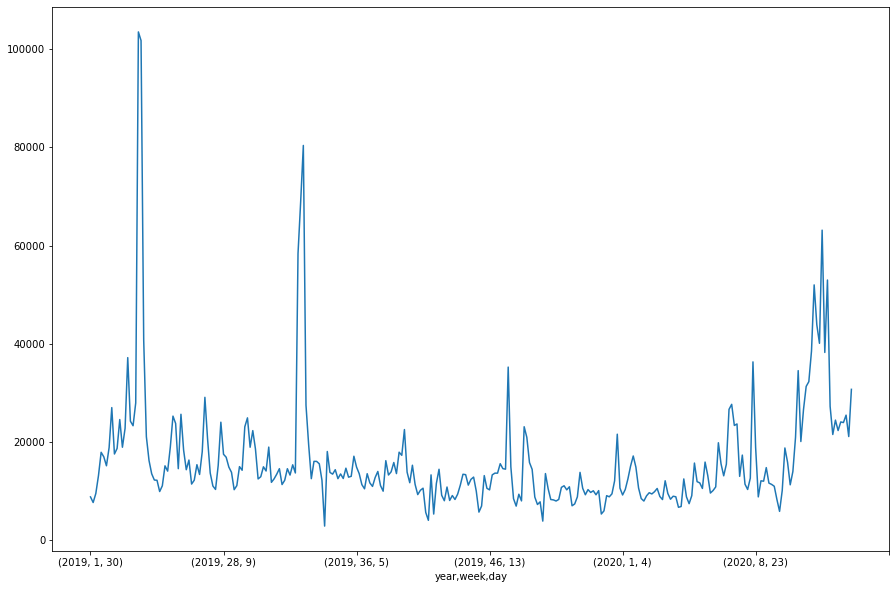

In [8]:
df_grouped_id = df.groupby(["year","month","day"]).count()
ax = df_grouped_id['created_at'].plot(figsize=(15,10));



In [9]:
df_grouped_id.head(5)





created_at     id   text  truncated  in_reply_to_status_id  \
year week day                                                               
2019 1    30         8710   8710   8710       8710                   3358   
          31         7567   7567   7567       7567                   3363   
     21   22         9404   9404   9404       9404                   3335   
          23        13061  13061  13061      13061                   4247   
          24        17812  17812  17812      17812                   6098   

               reply_count  retweet_count  favorite_count   lang  \
year week day                                                      
2019 1    30          8710           8710            8710   8710   
          31          7567           7567            7567   7567   
     21   22          9404           9404            9404   9404   
          23         13061          13061           13061  13061   
          24         17812          17812           17812  17812   

               timestamp_ms  extended_tweet  user_id  user_name  \
year week day                                                     
2019 1    30           8710               0     8710       8710   
          31           7567               0     7567       7567   
     21   22           9404               0     9404       9404   
          23          13061               0    13061      13061   
          24          17812               0    17812      17812   

               entities_user_mentions            week  
year week day                                          
2019 1    30                        0   (2019, 1, 30)  
          31                        0   (2019, 1, 31)  
     21   22                        0  (2019, 21, 22)  
          23                        0  (2019, 21, 23)  
          24                        0  (2019, 21, 24)